# COVID-19 Risk Classification: Comprehensive Analysis
This master notebook runs the EDA, feature engineering, model building, and evaluates model performance.

## 1. Exploratory Data Analysis (EDA)
Execute the notebook containing EDA steps.

In [21]:
import os
print(os.getcwd())
!ls

/Users/tiennguyen/Documents/School Year /Spring 2025/Project/DataScienceProject/notebooks
1_eda.ipynb
2_featureengineering_and_risklabeling.ipynb
3_modelbuilding.ipynb
4_visualization.ipynb
5_modelperformance.ipynb
us_covid_features_and_labels_cleaned.csv



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
First 5 rows of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 no

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,429435,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000
std,NaN,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769



Rows with USA iso_code: ...
        iso_code      continent       location       date  total_cases  \
403451      USA  North America  United States 2020-01-05          0.0   
403452      USA  North America  United States 2020-01-06          0.0   
403453      USA  North America  United States 2020-01-07          0.0   
403454      USA  North America  United States 2020-01-08          0.0   
403455      USA  North America  United States 2020-01-09          0.0   
...         ...            ...            ...        ...          ...   
405120      USA  North America  United States 2024-07-31  103436829.0   
405121      USA  North America  United States 2024-08-01  103436829.0   
405122      USA  North America  United States 2024-08-02  103436829.0   
405123      USA  North America  United States 2024-08-03  103436829.0   
405124      USA  North America  United States 2024-08-04  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
403451        0.0         

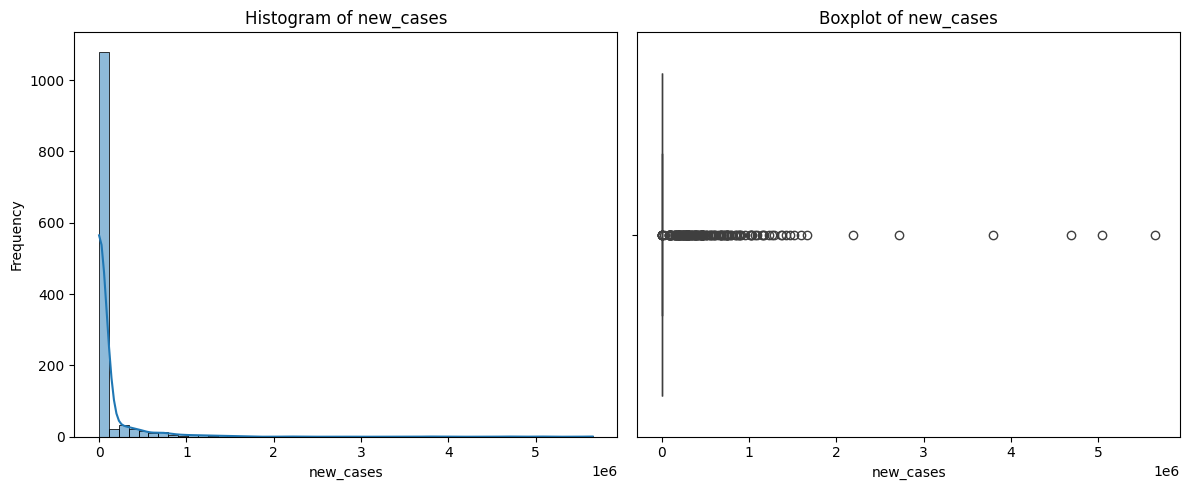

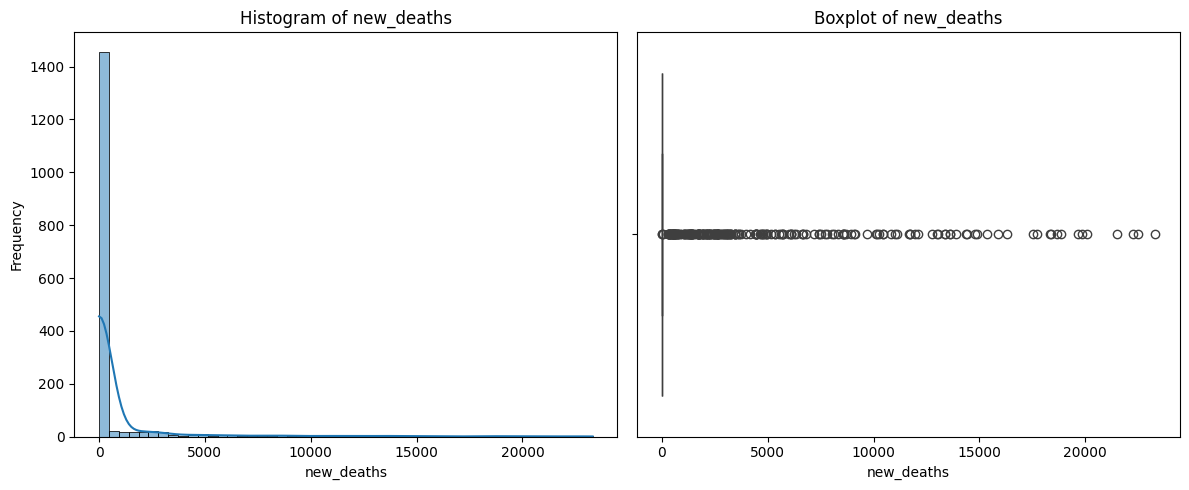

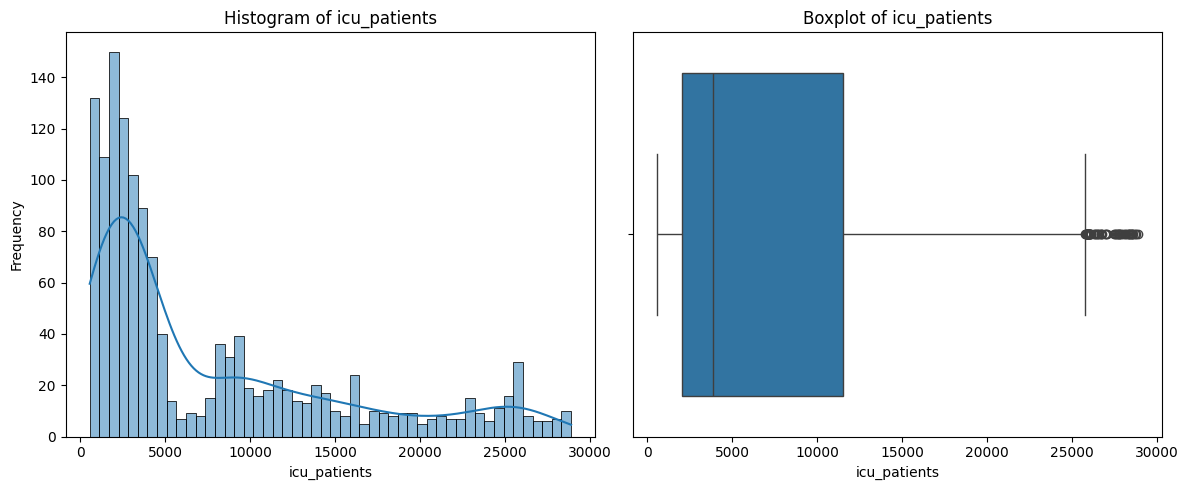

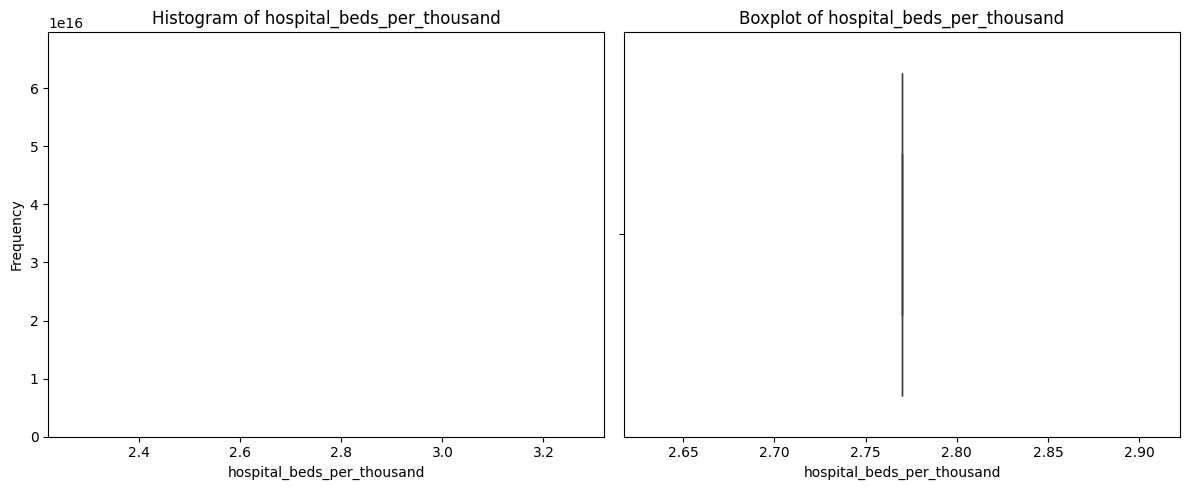

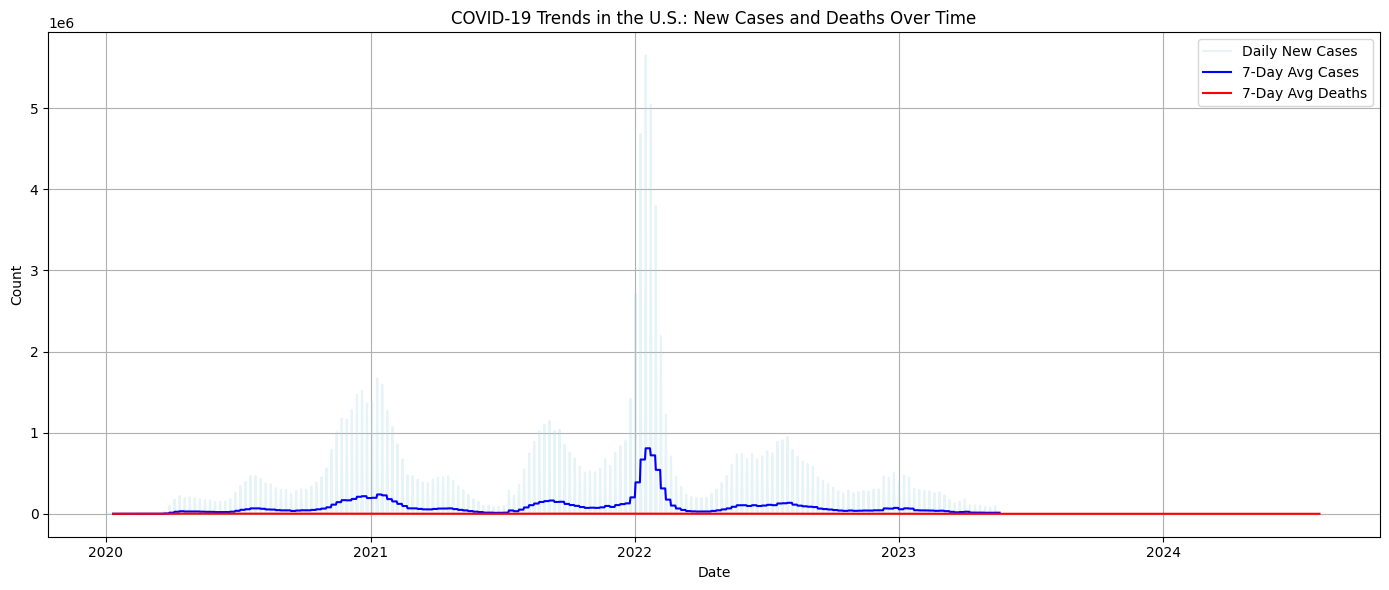

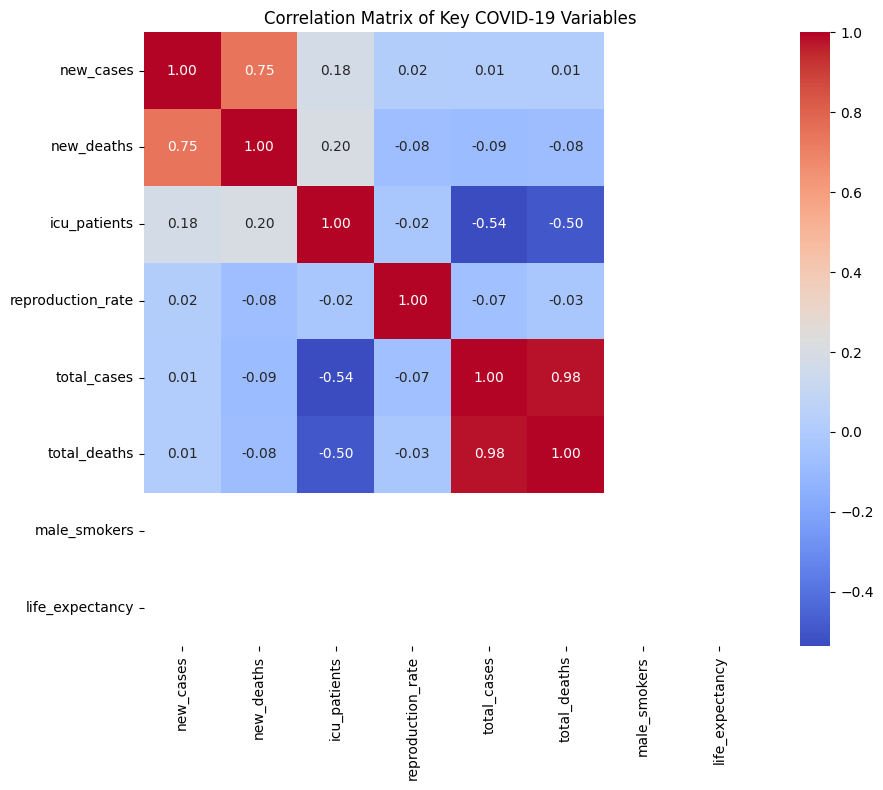

In [22]:
# Install the required nbformat and seaborn packages
%pip install nbformat seaborn

# Run the EDA notebook
%run ./1_eda.ipynb

## 2. Feature Engineering & Risk Labeling
Run the notebook that derives features and creates risk labels.

Data filtered to start at first case: 2020-01-26


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,7_day_avg_cases,7_day_avg_deaths
0,USA,North America,United States,2020-01-26,7.0,7.0,1.0,0.0,0.0,0.0,...,NaN,78.86,0.926,338289856,-9018.2,-3.64,-3.02,-26.844515,1.0,0.0
1,USA,North America,United States,2020-01-27,7.0,0.0,1.0,0.0,0.0,0.0,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,1.0,0.0
2,USA,North America,United States,2020-01-28,7.0,0.0,1.0,0.0,0.0,0.0,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,1.0,0.0
3,USA,North America,United States,2020-01-29,7.0,0.0,1.0,0.0,0.0,0.0,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,1.0,0.0
4,USA,North America,United States,2020-01-30,7.0,0.0,1.0,0.0,0.0,0.0,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,1.0,0.0



Columns and dtypes:
iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
7_day_avg_cases                                   float64
7_day_avg_deaths                                  float64
Length: 68, dtype: object


,date,new_cases,new_deaths,icu_patients,hosp_patients
0,2020-01-26,7.0,0.0,0.0,0.0
1,2020-01-27,0.0,0.0,0.0,0.0
2,2020-01-28,0.0,0.0,0.0,0.0
3,2020-01-29,0.0,0.0,0.0,0.0
4,2020-01-30,0.0,0.0,0.0,0.0


,date,new_cases,roll_cases,new_deaths,roll_deaths,icu_patients,roll_icu,hosp_patients,roll_hosp
6,2020-02-01,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,2020-02-02,2.0,0.285714,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,2020-02-03,0.0,0.285714,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,2020-02-04,0.0,0.285714,0.0,0.000000,0.0,0.000000,0.0,0.000000
10,2020-02-05,0.0,0.285714,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1001,2022-10-23,283734.0,40533.428571,2955.0,422.142857,2610.0,2697.000000,21143.0,21519.571429
1002,2022-10-24,0.0,40533.428571,0.0,422.142857,2673.0,2686.571429,21846.0,21526.000000
1003,2022-10-25,0.0,40533.428571,0.0,422.142857,2742.0,2687.142857,22213.0,21589.571429
1004,2022-10-26,0.0,40533.428571,0.0,422.142857,2716.0,2683.000000,22478.0,21685.142857


,date,pctchg_cases,pctchg_deaths
0,2020-01-26,0.0,0.0
1,2020-01-27,-1.0,0.0
2,2020-01-28,0.0,0.0
3,2020-01-29,0.0,0.0
4,2020-01-30,0.0,0.0
5,2020-01-31,0.0,0.0
6,2020-02-01,0.0,0.0
7,2020-02-02,inf,0.0
8,2020-02-03,-1.0,0.0
9,2020-02-04,0.0,0.0


,date,composite_index
6,2020-02-01,0.250000
7,2020-02-02,0.071429
8,2020-02-03,0.071429
9,2020-02-04,0.071429
10,2020-02-05,0.071429
11,2020-02-06,0.071429
12,2020-02-07,0.071429
13,2020-02-08,0.071429
14,2020-02-09,0.392857
15,2020-02-10,0.392857


risk_label
Low       549
Medium    549
High      549
Name: count, dtype: int64

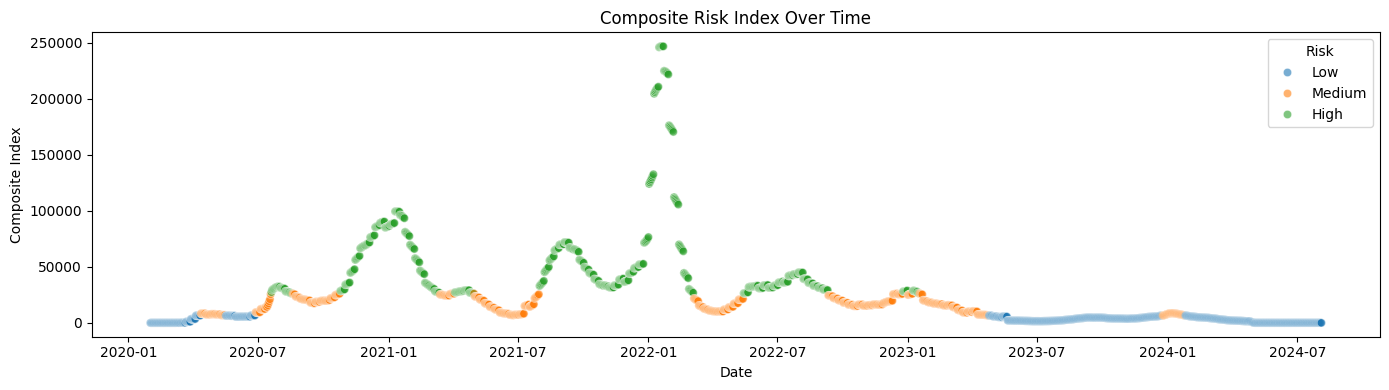

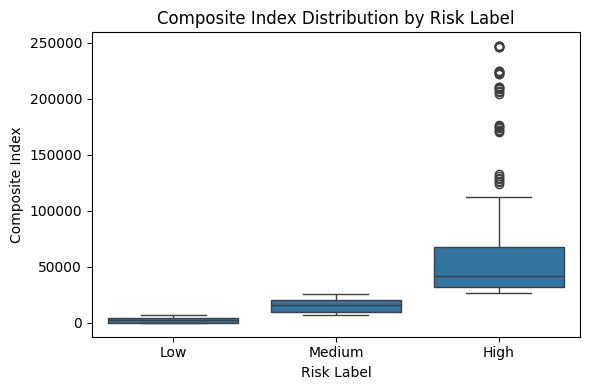

/var/folders/54/p91pckh11yzbfwsdrx0hgw400000gn/T/ipykernel_57303/1126365485.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = us.groupby(['month','risk_label']).size().unstack(fill_value=0)


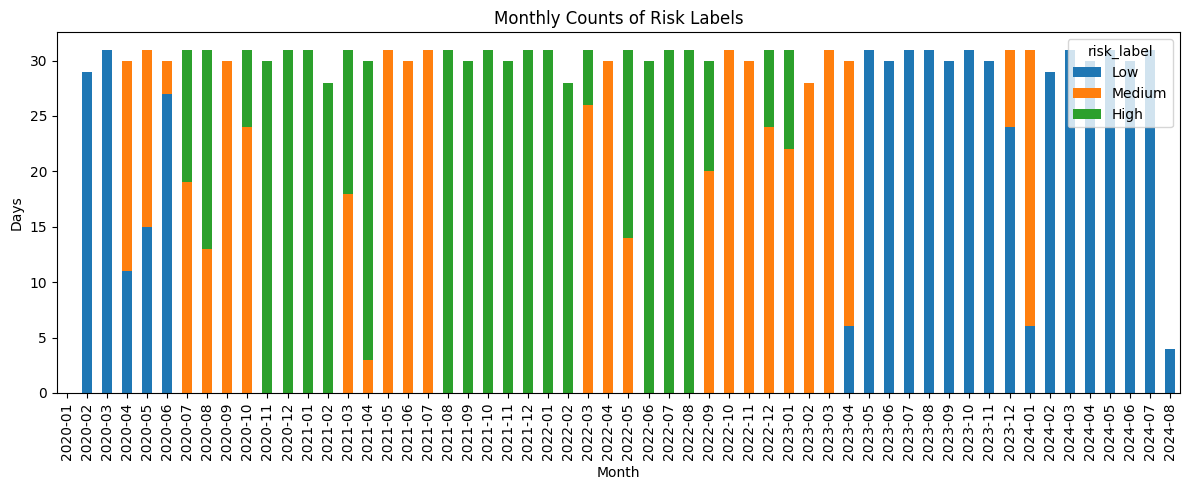

Saved us_covid_features_and_labels_cleaned.csv


In [23]:
%run ./2_featureengineering_and_risklabeling.ipynb

## 3. Model Building
Execute the notebook that trains classification models.


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Features used: ['roll_cases', 'roll_deaths', 'roll_icu', 'roll_hosp', 'pctchg_cases', 'pctchg_deaths']
Target distribution:
 risk_label
Low       558
Medium    558
High      558
Name: count, dtype: int64


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

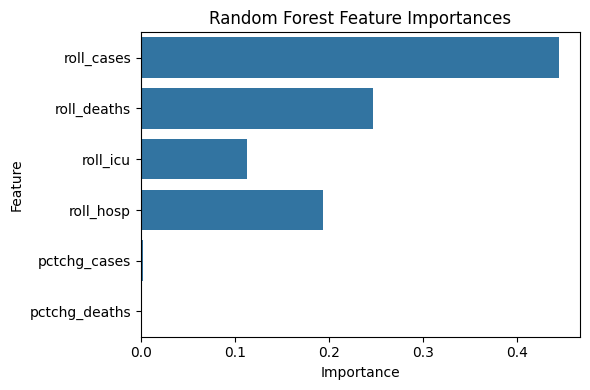

In [24]:
%run ./3_modelbuilding.ipynb

## 4. Model Performance Evaluation
Assess the best model with confusion matrix, classification report, ROC curve, and feature importance.

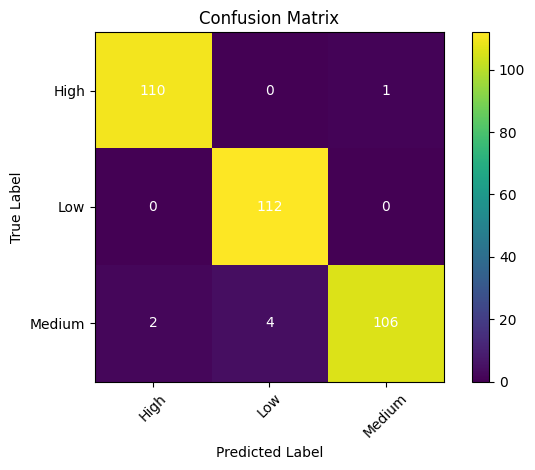

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.99      0.99       111
         Low       0.97      1.00      0.98       112
      Medium       0.99      0.95      0.97       112

    accuracy                           0.98       335
   macro avg       0.98      0.98      0.98       335
weighted avg       0.98      0.98      0.98       335



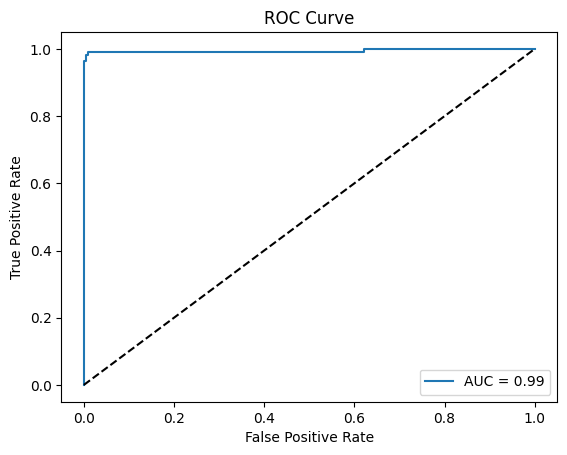

Best model does not support feature importances.


In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define the best model
best_model = gs.best_estimator_  # Use the best estimator from the grid search

# 1. Determine class labels
if hasattr(best_model, 'classes_'):
    labels = best_model.classes_
elif hasattr(best_model, 'named_steps'):
    # grab the last step in the pipeline
    last = list(best_model.named_steps.values())[-1]
    labels = last.classes_ if hasattr(last, 'classes_') else np.unique(y_test)
else:
    labels = np.unique(y_test)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.tight_layout()
plt.show()

# 2. Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# 3. ROC Curve
# Handle 1D vs 2D predict_proba output
if hasattr(best_model, 'predict_proba'):
    # y_proba might be shape (n_samples,) or (n_samples, n_classes)
    if y_proba.ndim == 1:
        y_score = y_proba
    else:
        # find index of the 'positive' class (e.g. the class you care about)
        # here we pick the second class by default
        pos_idx = 1  
        y_score = y_proba[:, pos_idx]
else:
    # fallback to decision_function for models without predict_proba
    y_score = best_model.decision_function(X_test)

# Now compute ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=best_model.classes_[pos_idx] if hasattr(best_model, 'classes_') else 1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 4. Feature Importances (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_test.columns if hasattr(X_test, 'columns') else np.arange(len(importances))
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title('Feature Importances')
    plt.barh(np.array(feature_names)[indices], importances[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.show()
else:
    print("Best model does not support feature importances.")
